<img src="../img/logo_white_bkg_small.png" align="left" />

# Worksheet 7.0 Anomaly Detection - Answers

This worksheet covers concepts relating to Anomaly Detection.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (http://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (http://matplotlib.org/api/pyplot_api.html)
* PyFlux (https://pyflux.readthedocs.io/en/latest/)
* StatsModels (https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html)

**Note:  At the time of writing, PyFlux does not work with Python 3.7, so this worksheet uses `StatsModels`.  The basic functionality is the same.**


In [ ]:
!pip install statsmodels

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
style.use("ggplot")
%matplotlib inline

## Step One:  Get the Data
For this example, we will be looking at CPU Utilization Data to see if we can identify periods of unusual activity.  First, let's load the data:

In [7]:
df = pd.read_csv('../data/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)

In [8]:
df.describe()

,cpu
count,420.000000
mean,1.233262
std,0.505668
min,0.570000
25%,0.787500
50%,1.110000
75%,1.582500
max,2.550000


In [9]:
df.sample()

,datetime,cpu
18,2017-01-27 19:00:00,0.93


Let's take a look at the data by plotting it:

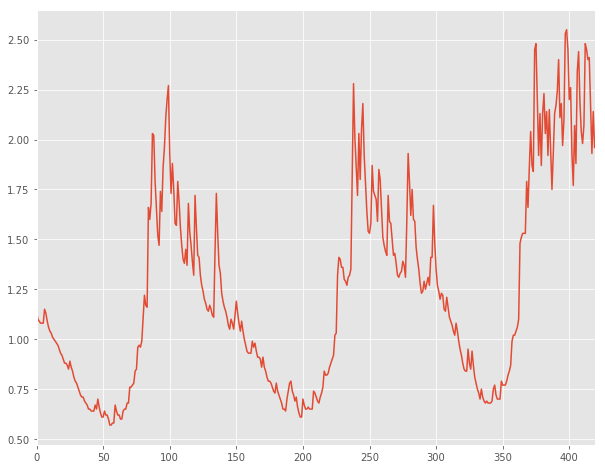

In [12]:
df['cpu'].plot(figsize=(10,8))

## Step Two:  Fit an ARIMA Model
Since we are dealing with time series data, the 

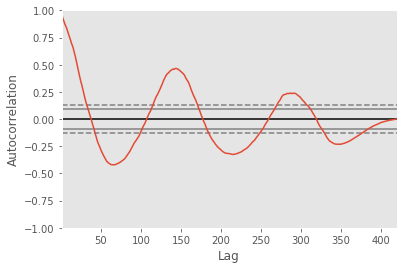

In [17]:
autocorrelation_plot(df['cpu'])

In [20]:
model = ARIMA(df['cpu'], order=(11,0,11))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    cpu   No. Observations:                  420
Model:                   ARMA(11, 11)   Log Likelihood                 299.481
Method:                       css-mle   S.D. of innovations              0.116
Date:                Thu, 07 Mar 2019   AIC                           -550.963
Time:                        08:16:20   BIC                           -453.996
Sample:                             0   HQIC                          -512.637
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2219      0.070     17.441      0.000       1.085       1.359
ar.L1.cpu      0.6241      0.150      4.167      0.000       0.331       0.918
ar.L2.cpu      0.2444      0.044      5.516      0.0

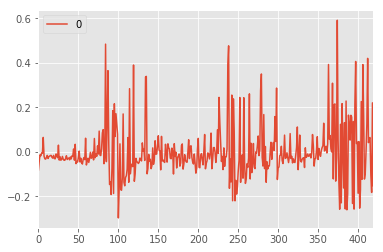

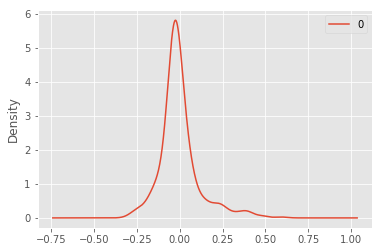

                0
count  420.000000
mean    -0.001336
std      0.117966
min     -0.297532
25%     -0.049667
50%     -0.021230
75%      0.026863
max      0.591246


In [22]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())